In [1]:
#Jake's Notebook

##### Import City ######

import pandas as pd
import sqlite3
import numpy as np
import datetime
import matplotlib.pyplot as plot
import seaborn as sns

##### Cleaning Up This Disgusting Data %%%%%%
df = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/tn.movie_budgets.csv.gz')
df.drop(df.domestic_gross.name, axis=1, inplace=True)
df.drop(df.id.name, axis=1, inplace=True)
df['worldwide_gross'] = df['worldwide_gross'].astype(str)
df['production_budget'] = df['production_budget'].astype(str)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '')
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '')
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
df.worldwide_gross = pd.to_numeric(df.worldwide_gross, errors='coerce')
df.production_budget = pd.to_numeric(df.production_budget, errors='coerce')
df = df.rename(columns={'production_budget': 'Budget', 'worldwide_gross': 'Total Gross', 'movie': 'Title', 'release_date': 'Year'})
df['Year'] = pd.to_datetime(df['Year'])
df['Released'] = df['Year'].dt.year
df.drop(df.Year.name, axis=1, inplace=True)
df['Profit'] = df['Total Gross']-df['Budget']
df['Pure Profit'] = df['Profit']/df['Total Gross']
df['Pure Profit'] = df['Pure Profit']*100
df.drop(df.Profit.name, axis=1, inplace=True)

##### Printing the Top 10 most profitable movies #####
df = df.reset_index(drop=True)
df = df.loc[df["Released"] >=2017 ]
df = df.loc[df["Pure Profit"] >=1540]
df.sort_values(['Pure Profit'], ascending=[False])
df.sort_values(['Pure Profit'], ascending=[0], inplace=True)
df

,Title,Budget,Total Gross,Released,Pure Profit


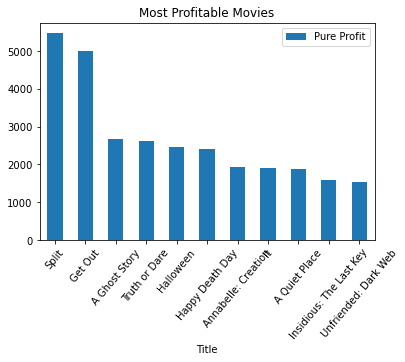

In [27]:
###### Creating a bar chart #######

df.plot.bar(x="Title", y="Pure Profit", rot=50, title="Most Profitable Movies");
plot.show(block=True);

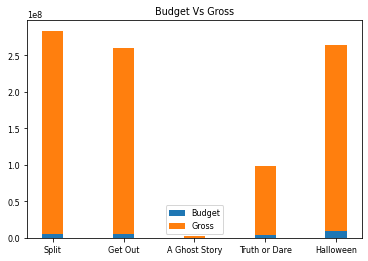

In [51]:
plot.rcParams['font.size'] = 8.0

labels = ['Split', 'Get Out', 'A Ghost Story', 'Truth or Dare', 'Halloween']
men_means = [5000000, 5000000, 100000, 3500000, 10000000]
women_means = [278964806, 255367951, 2769782, 95127344, 254900667]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.30      # the width of the bars: can also be len(x) sequence

fig, ax = plot.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Budget')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Gross')


ax.set_title('Budget Vs Gross')
ax.legend()

plot.show()

In [52]:
##### Useless Piechart / Unsubtle Shyamalan dig #####


plot.rcParams['font.size'] = 13.0
labels = 'Budget', 'Profit'
sizes = [5000000, 278964806]
explode = (0.9, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Somehow M.Knight Managed\n" + "to Make The Most Profitable Movie", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


NameError: name 'plt' is not defined

In [55]:
##### Futzin' Around ####

rt = pd.read_csv('C:/Users/Jake/Documents/Flatiron/projectfinal/Microsoft-Pitch/zippedData/rt.movie_info.tsv.gz',sep='\t', index_col=0)
rt.drop(rt.synopsis.name, axis=1, inplace=True)
rt.drop(rt.writer.name, axis=1, inplace=True)
rt.drop(rt.dvd_date.name, axis=1, inplace=True)
rt.drop(rt.currency.name, axis=1, inplace=True)
rt.dropna(inplace=True)
rt




,rating,genre,director,theater_date,box_office,runtime,studio
id,,,,,,,
3,R,Drama|Science Fiction and Fantasy,David Cronenberg,"Aug 17, 2012","600,000",108 minutes,Entertainment One
10,PG-13,Comedy,Jake Kasdan,"Jan 11, 2002","41,032,915",82 minutes,Paramount Pictures
13,R,Drama,Ray Lawrence,"Apr 27, 2006","224,114",123 minutes,Sony Pictures Classics
22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,"Dec 17, 2010","1,039,869",108 minutes,ATO Pictures
25,PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,"Dec 25, 2013","20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...
1968,PG,Comedy|Drama,Cameron Crowe,"Dec 23, 2011","72,700,000",126 minutes,20th Century Fox
1976,NR,Action and Adventure|Art House and International,Ciro Guerra,"Feb 17, 2016","1,320,005",123 minutes,Buffalo Films
1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,"Sep 30, 2005","25,335,935",119 minutes,Universal Pictures
